### Imports

In [1]:
import osmnx as ox
import geopandas as gpd
import networkx as nx

import folium
import branca.colormap as cmap # a folium spin-off for colormapping.

In [2]:
# Generate a random seed for reproducibility
seed = 42
import random
random.seed(seed)

### Simulation
The rules of the simulation are as follows:
- Each timestep t represents a day. We simulate for each Agent the course of one day
- Each agent represents a person living at a specific residence in Eindhoven
- Each agent has a list of amenity types that they visit regularly and a probability that they will visit it on any given day.
- Each agent can either walk or cycle to work. They randomly choose whether they walk or cycle each day.
- Some agents have a workplace. This can be one of the amenity types. They will always go to the same workplace with a high probability on each day.
- For the amenities they don’t work at, an agent keeps a list of the closest n amenities to their home or workplace, and go to one of those on the list based on a geometrically decreasing probability in order of proximity. We name this probability "curiosity".

In [3]:
# Initialization
import Person as ps

G = ps.dists.G_bike
# Get the nodes and edges of the graph
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Adapted from eindhovenMap.py
tags = {
    'office': ['yes'],
    'amenity': [
        'pharmacy', 'hospital', 'clinic', 'doctors', 
        'school', 'kindergarten', 'college', 'university',  
        'cafe', 'restaurant', 'bar', 'cinema', 'theatre',  
        'community_centre', 'library', 'bicycle_rental',
        'place_of_worship', 
    ],
    'leisure': [
        'park', 'fitness_centre', 'sports_centre', 'stadium', 
        'dog_park', 'pitch', 'swimming_pool'
    ]
}

# Get the amenities of the area
amenities = ox.features_from_place(ps.dists.place, tags=tags)

# Get the residences of the area
residences = ox.features_from_place(ps.dists.place, tags={'building': ['residential']})


Loading networks v3


### Prep

We have a map of Eindhoven where we can sample two nodes: a randomly-chosen residence and randomly-chosen amenity. We can map the route between them with ox using matplotlib as backend. 

51.43057169389951 5.4616848743903015
51.4389892 5.4783482
Origin node: 77971138
Destination node: 660852949
Route: [77971138, 77971572, 42609013, 42609268, 42608269, 42608096, 42607934, 42607203, 42607086, 42608518, 42608889, 42607421, 42607216, 42607161, 42605855, 42608346, 42609226, 42610618, 42609571, 42608972, 42609040, 42608674, 42608271, 42607514, 42606659, 42607373, 42606905, 42607754, 660852949]


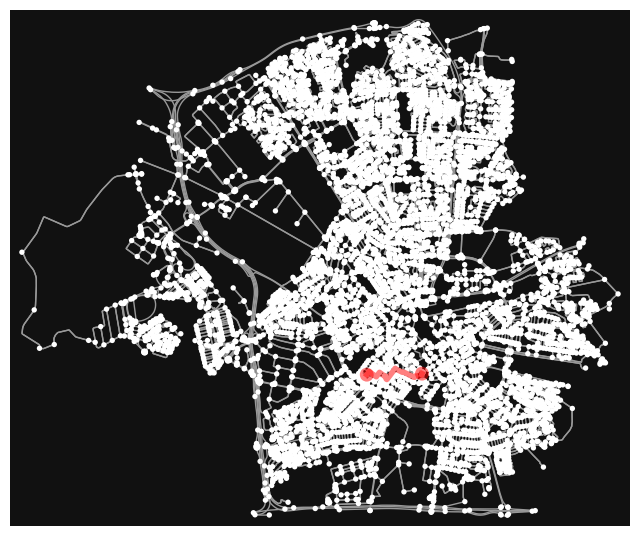

77971138
42629866


In [7]:
# For now just simulate a single agent
# Create a random agent


import matplotlib as plt

# Get the coordinates of a random residence
rcoords = residences.sample(1).geometry.values[0].centroid.coords[0]
# Get the coordinates of a random workplace
wcoords = amenities.sample(1).geometry.values[0].centroid.coords[0]

print(rcoords[1], rcoords[0])
print(wcoords[1], wcoords[0])

orig = ox.distance.nearest_nodes(G, X=rcoords[0], Y=rcoords[1]) 
dest = ox.distance.nearest_nodes(G, X=wcoords[0], Y=rcoords[1]) 

print(f"Origin node: {orig}")
print(f"Destination node: {dest}")

route = nx.shortest_path(G, orig, dest, weight='length')
print(f"Route: {route}")
ox.plot_graph_route(G, route)


print(ox.distance.nearest_nodes(
    G, 
    X=rcoords[0],
    Y=rcoords[1],
))
print(ox.distance.nearest_nodes(
    G, 
    X=wcoords[0],
    Y=wcoords[1],
))






In [9]:
print(ps.dists.calculate_distances(
    ps.dists.G_walk, rcoords, wcoords
))

agent = ps.Person(
    residence_coords= rcoords, 
    work_coords= wcoords,
    walk_speed=4,
    seed=seed
)

agent.simulate_day()

Start node: 77971138, End node: 42629866
3272.7242756485143
Start node: 77971138, End node: 42629866
Start node: 77971138, End node: 42629866
Distances from residence to work:
3272.7242756485143
3272.7242756485143
Agent is walking today.
Travel time to work: 49.09086413472772 minutes
No amenity frequencies specified.


np.float64(49.09086413472772)